# In-Class assignment L3: Post-ANOVA Analysis

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from statsmodels.formula.api import ols # Require patsy version 5.0.1+
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_excel('data/lect03-anova.xlsx', sheet_name='Interactive')
df

,System,ResponseTime
0,SystemA,0.960
1,SystemA,1.030
2,SystemA,0.770
3,SystemA,0.880
4,SystemA,1.060
5,SystemA,0.990
6,SystemA,0.720
7,SystemA,0.860
8,SystemA,0.970
9,SystemA,0.900


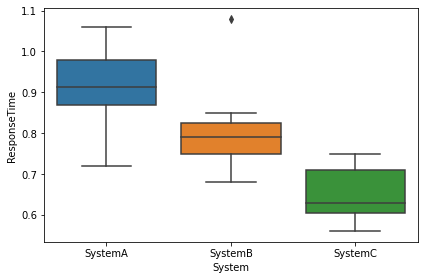

In [23]:
fig = plt.figure(figsize=(6,4));
sns.boxplot(x='System',y='ResponseTime',data=df)
plt.tight_layout()
pass;

# Check if the normality assumption is met.


## Ans. Residuals มีการกระจายตัวในแต่ละกลุ่มใกล้เคียงกัน และในส่วนของกราฟ Normal plot มีการเรียงตัวตามแนวเส้นตรง ดังั้นข้อมูลจึงเป็นแบบ normal distribution

In [24]:
def check_anova_normality(group, x):

    T = len(x)
    
    fig = plt.figure(figsize=(10,8))

    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    #ax1.plot(x, color='blue', alpha=0.5, linestyle='--', marker='o', ms=4)
    n=len(x)
    sns.residplot(np.linspace(1,n,n), x, color='blue', ax=ax1)
    ax1.set_title('Sequence plot')
    
    # Scatter plot
    #ax2.scatter(x, x.shift(), alpha=0.5, color='red')
    #ax2.set_title(r'Scatter plot of $e_n$ vs $e_{n+1}$')
    
    # Residual groupplot
    resid_df = pd.DataFrame({'Group':group, 'Resid':x})
    sns.stripplot(x='Group', y='Resid', data=resid_df, ax=ax2) 
    ax2.set_title('Residuals by treatments')
    
    # Box plot
    #ax2.boxplot(x,showmeans=True)
    #ax2.set_title('Boxplot')

    # histogram plot
    sns.distplot(x, hist=True, kde=True, ax=ax3)
    ax3.set_title('Histogram')


    # qq plot
    sm.graphics.qqplot(x,line='q',ax=ax4)
    ax4.set_title('Normal plot')
    plt.tight_layout()

In [1]:
check_anova_normality(df['System'], sys_interac_model.resid)

NameError: name 'check_anova_normality' is not defined

# Determine which pairs of systems have different mean response times?

## Ans. Every pairs of systems have different mean response times.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
SystemA SystemB   -0.111 0.0247 -0.2095 -0.0125   True
SystemA SystemC    -0.26  0.001 -0.3585 -0.1615   True
SystemB SystemC   -0.149 0.0022 -0.2475 -0.0505   True
------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


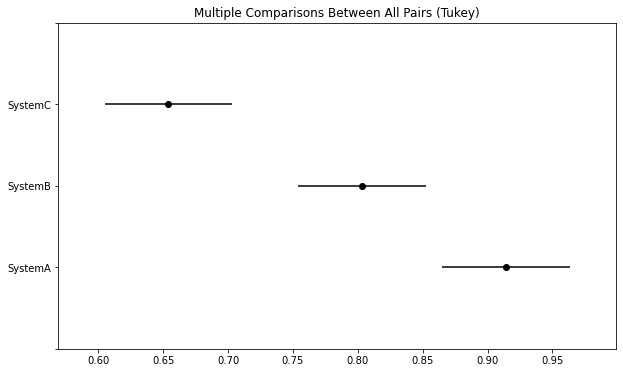

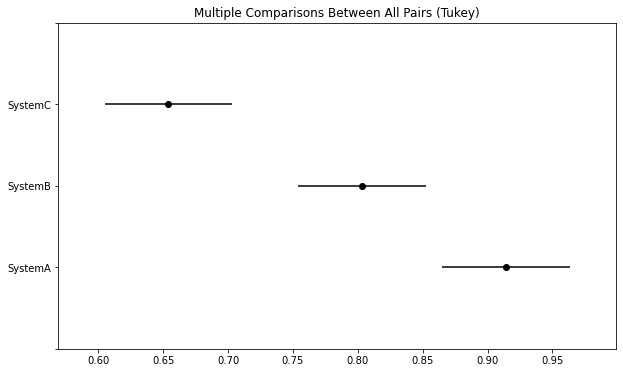

In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# alpha = Family-wise error rate
result=pairwise_tukeyhsd(df['ResponseTime'],df['System'],alpha=0.05)
print(result)
result.plot_simultaneous()

# Suppose we want to the test to detect the mean difference of any two systems that is larger than a with probability at Least 0.9, what should be the number of sessions to collect the data?

## Ans. Sample sizes is 27 โดยมีค่า power of statistics test =0.9